# Neural Network

In [21]:
import pandas as pd
import numpy as np

## Data Import

In [22]:
df_train = pd.read_csv('raw_data/train.csv')
df_test = pd.read_csv('raw_data/test.csv')
df_submission = pd.read_csv("raw_data/example-submission.csv")

Import auxiliary data and select useful columns

In [23]:
df_train_aux = pd.read_csv('raw_data/train_auxiliary_data.csv', index_col=0)
df_test_aux = pd.read_csv('raw_data/test_auxiliary_data.csv', index_col=0)

useful_columns = ['nearest_mrt_line', 'dist_meters_to_nearest_mrt', 'dist_meters_to_nearest_mall',
       'dist_meters_to_nearest_commercial_centre',
       'dist_meters_to_nearest_primary_school',
       'dist_meters_to_nearest_secondary_school']
df_train_aux = df_train_aux[useful_columns]
df_test_aux = df_test_aux[useful_columns]

Join the auxiliary data to the dataset

In [24]:
df_train = df_train.join(df_train_aux)
df_test = df_test.join(df_test_aux)

## Data pre-processing

Clean dirty values and drop outliers identified in EDA.

In [25]:
from src.preprocessing import clean_property_type, fill_missing_values, update_data, drop_outliers

def data_cleaning(df):
    df_clean = df.copy()
    df_clean = clean_property_type(df_clean)
    df_clean = fill_missing_values(df_clean)
    df_clean = update_data(df_clean)
    return df_clean

In [26]:
df_train = data_cleaning(df_train)
df_train = drop_outliers(df_train)

df_test = data_cleaning(df_test)

Drop unused columns from the original dataset.

In [27]:
from src.preprocessing import drop_columns
df_train = drop_columns(df_train)
df_test = drop_columns(df_test)

### Separate into X and y DataFrames

In [28]:
y_train = df_train['price']
X_train = df_train.drop('price', axis=1)
X_test = df_test

## Encoding

Check the number of unique values for each categorical feature.

In [29]:
X_train.describe(include='object')

,property_type,tenure,planning_area,nearest_mrt_line
count,20242,20242,20242,20242
unique,15,11,43,8
top,condo,99-year leasehold,bukit timah,dt
freq,9642,12842,1323,4494


For the numerical variables, the order of magnitude varies, so normalization is carried out.

In [30]:
X_train.describe()

,built_year,num_beds,num_baths,size_sqft,lat,lng,dist_meters_to_nearest_mrt,dist_meters_to_nearest_mall,dist_meters_to_nearest_commercial_centre,dist_meters_to_nearest_primary_school,dist_meters_to_nearest_secondary_school
count,20242.00000,20242.000000,20242.000000,20242.000000,20242.000000,20242.000000,20242.000000,20242.000000,20242.000000,20242.000000,20242.000000
mean,2010.78678,3.118615,2.631311,1711.291374,1.339994,103.843159,787.372721,794.325956,1916.811853,739.733503,821.856021
std,15.66283,1.280566,1.461078,1850.382364,0.046302,0.054085,554.400468,529.386317,1059.405893,535.123264,615.858802
min,1963.00000,1.000000,1.000000,65.000000,1.239621,103.685206,5.257545,0.000000,89.629657,0.000000,0.000000
25%,2000.00000,2.000000,2.000000,807.000000,1.307313,103.806671,401.576118,401.713836,1168.879720,371.143964,430.393277
50%,2017.00000,3.000000,2.000000,1119.000000,1.328225,103.841572,658.704159,678.778647,1681.479925,605.146080,685.280667
75%,2023.00000,4.000000,3.000000,1528.000000,1.371107,103.880155,999.991303,1039.547208,2423.052923,997.606995,1029.960484
max,2028.00000,10.000000,10.000000,30000.000000,1.461582,103.997510,4113.783288,4028.204443,5797.965651,4009.378093,4442.112669


In [31]:
X_test.describe()

,built_year,num_beds,num_baths,size_sqft,lat,lng,dist_meters_to_nearest_mrt,dist_meters_to_nearest_mall,dist_meters_to_nearest_commercial_centre,dist_meters_to_nearest_primary_school,dist_meters_to_nearest_secondary_school
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,2010.754571,3.085857,2.614714,1709.027000,1.339711,103.843177,787.154986,785.993608,1924.896385,735.360130,826.887814
std,15.537008,1.277779,1.456611,1860.113894,0.046020,0.054518,550.611829,524.112192,1070.695689,534.888693,617.764963
min,1963.000000,1.000000,1.000000,68.000000,1.239621,103.686082,5.257545,0.000000,93.334138,0.000000,67.393276
25%,2000.000000,2.000000,2.000000,797.000000,1.307069,103.806577,400.608170,398.022578,1173.475276,365.638318,434.994799
50%,2016.000000,3.000000,2.000000,1119.000000,1.328282,103.842259,656.923572,670.208758,1681.479925,603.752052,675.767381
75%,2023.000000,4.000000,3.000000,1528.000000,1.369892,103.879060,1014.802226,1027.768950,2423.052923,996.729477,1029.960484
max,2028.000000,10.000000,10.000000,27500.000000,1.461582,103.997510,3983.074990,3897.147058,5574.454058,4009.378093,4442.112669


In [32]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer

cat_vars = list(X_train.select_dtypes('object'))
num_vars = list(X_train.select_dtypes('number'))

ct = make_column_transformer(
    (MinMaxScaler(), num_vars),
    (OneHotEncoder(handle_unknown='infrequent_if_exist'), cat_vars),
    remainder='passthrough',
    verbose_feature_names_out=False
)

# Fit the column transformer
ct.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['built_year', 'num_beds', 'num_baths',
                                  'size_sqft', 'lat', 'lng',
                                  'dist_meters_to_nearest_mrt',
                                  'dist_meters_to_nearest_mall',
                                  'dist_meters_to_nearest_commercial_centre',
                                  'dist_meters_to_nearest_primary_school',
                                  'dist_meters_to_nearest_secondary_school']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                 ['property_type', 'tenure', 'planning_area',
                                  'nearest_mrt_line'])],
                  verbose_feature_names_out=False)

In [33]:
# Transform the features
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

# Convert to np array since keras can't work with csr_matrix
X_train = X_train.toarray()
X_test = X_test.toarray()

## Fitting model

Create a validation dataset

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import layers, Sequential, Input
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [36]:
def build_and_compile_model(X_train, learning_rate):

  n_features = X_train.shape[1]
  
  model = Sequential()
  model.add(layers.Dense(128, activation='relu', input_shape=(n_features,)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1, activation='relu'))

  model.compile(loss='mean_squared_error',
                optimizer=Adam(learning_rate=learning_rate),
                metrics=RootMeanSquaredError())
  return model

def plot_loss(history):
    # plot learning curves
    plt.title('Learning Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Root Mean Squared Error')
    plt.plot(np.sqrt(history.history['loss']), label='train')
    plt.plot(np.sqrt(history.history['val_loss']), label='val')
    plt.legend()
    plt.show()

In [37]:
model = build_and_compile_model(X_train, 0.05)
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               11392     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 19,713
Trainable params: 19,713
Non-trainable params: 0
_________________________________________________________________


In [38]:
# configure callbacks
# es = EarlyStopping(monitor='val_loss', patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=64,
    epochs=500,
    validation_data=(X_val, y_val),
    verbose=1,
    callbacks=[reduce_lr],
)

Epoch 1/500
238/238 [==============================] - 1s 1ms/step - loss: 20315350499328.0000 - root_mean_squared_error: 4507255.5000 - val_loss: 10707230785536.0000 - val_root_mean_squared_error: 3272190.5000 - lr: 0.0500
Epoch 2/500
238/238 [==============================] - 0s 997us/step - loss: 9684759085056.0000 - root_mean_squared_error: 3112034.5000 - val_loss: 7886223704064.0000 - val_root_mean_squared_error: 2808242.0000 - lr: 0.0500
Epoch 3/500
238/238 [==============================] - 0s 1ms/step - loss: 8216321720320.0000 - root_mean_squared_error: 2866412.7500 - val_loss: 7379106136064.0000 - val_root_mean_squared_error: 2716451.0000 - lr: 0.0500
Epoch 4/500
238/238 [==============================] - 0s 985us/step - loss: 7700993802240.0000 - root_mean_squared_error: 2775066.5000 - val_loss: 7047981039616.0000 - val_root_mean_squared_error: 2654803.5000 - lr: 0.0500
Epoch 5/500
238/238 [==============================] - 0s 1ms/step - loss: 7388708995072.0000 - root_mean_

## Model Results

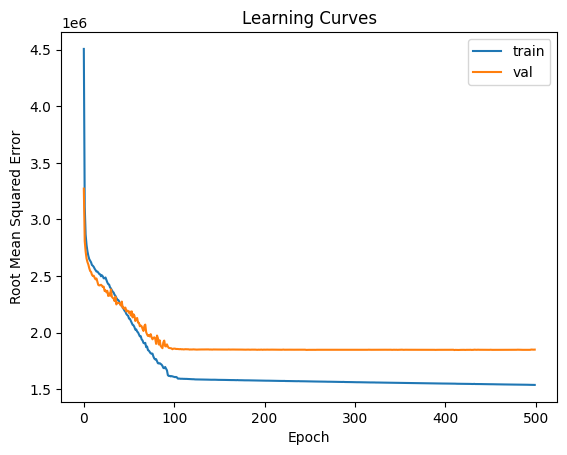

In [39]:
plot_loss(history)

In [41]:
print("Evaluate on valuation set")
results = model.evaluate(X_val, y_val, batch_size=32)

Evaluate on valuation set
159/159 [==============================] - 0s 600us/step - loss: 3419772551168.0000 - root_mean_squared_error: 1849262.7500


Save the model

In [42]:
model.save('models/neural_network_model')

INFO:tensorflow:Assets written to: models/neural_network_model\assets


## Predictions

In [43]:
print("Generate predictions")
pred = model.predict(X_test)
print("predictions shape:", pred.shape)

Generate predictions
219/219 [==============================] - 0s 549us/step
predictions shape: (7000, 1)


In [44]:
df_submission["Predicted"] = pred
df_submission

,Id,Predicted
0,0,1.468984e+06
1,1,1.416594e+06
2,2,1.218246e+06
3,3,6.352670e+05
4,4,6.718339e+05
...,...,...
6995,6995,1.917128e+07
6996,6996,1.091102e+07
6997,6997,3.306953e+06
6998,6998,5.950048e+05


In [45]:
df_submission.to_csv("neural_network_submission.csv", index=0)